[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ArtIC-TITECH/b3-proj-2023/blob/main/docs/class_02.ipynb)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [2]:
# 普通のtransform (変更可能)
transform_normal = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# テストデータには普通のtransformを使ってください
transform_for_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_normal)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_for_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
class SimpleModel(nn.Module):
    def __init__(self): # モデルのセットアップ
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x): # モデルが行う処理
        x = x.view(-1, 28 * 28)  # 28x28の画像を１次元に変換
        x = self.fc1(x) # ベクトルサイズを28x28から128へ
        x = nn.ReLU()(x) # 活性化関数
        x = self.fc2(x) # ベクトルサイズを128から128へ
        x = nn.ReLU()(x) # 活性化関数
        x = self.fc3(x) # ベクトルサイズを128から10へ
        return x

# モデルのインスタンスを作成
model = SimpleModel()

In [4]:
criterion = nn.CrossEntropyLoss()
# 変更可能
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [5]:
# エポック数
epochs = 30

# 訓練とテストの損失・精度を記録するリスト
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    # 訓練フェーズ
    model.train()  # 訓練モード
    loss_sum = 0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        # モデルの予測
        outputs = model(images)

        # 損失の計算
        loss = criterion(outputs, labels)
        loss_sum += loss.item()

        # 勾配の初期化
        optimizer.zero_grad()

        # バックプロパゲーション
        loss.backward()

        # オプティマイザの更新
        optimizer.step()

        # 精度の計算
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # 訓練損失と訓練精度
    avg_train_loss = loss_sum / len(train_loader)
    train_loss = avg_train_loss
    train_accuracy = 100 * correct_train / total_train

    # テストフェーズ
    model.eval()  # 評価モード
    loss_sum_test = 0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_sum_test += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # テスト損失とテスト精度
    avg_test_loss = loss_sum_test / len(test_loader)
    test_loss = avg_test_loss
    test_accuracy = 100 * correct_test / total_test

    # 訓練とテストの損失・精度をリストに保存
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # 損失と精度を表示
    print(f'Epoch [{epoch+1}/{epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/20]
Train Loss: 0.4583, Train Accuracy: 85.54%
Test Loss: 0.2501, Test Accuracy: 91.74%
Epoch [2/20]
Train Loss: 0.1797, Train Accuracy: 94.38%
Test Loss: 0.2008, Test Accuracy: 93.71%
Epoch [3/20]
Train Loss: 0.1302, Train Accuracy: 95.90%
Test Loss: 0.1221, Test Accuracy: 96.03%
Epoch [4/20]
Train Loss: 0.1034, Train Accuracy: 96.78%
Test Loss: 0.1012, Test Accuracy: 96.82%
Epoch [5/20]
Train Loss: 0.0849, Train Accuracy: 97.39%
Test Loss: 0.1181, Test Accuracy: 96.33%
Epoch [6/20]
Train Loss: 0.0737, Train Accuracy: 97.67%
Test Loss: 0.1002, Test Accuracy: 96.86%
Epoch [7/20]
Train Loss: 0.0644, Train Accuracy: 97.92%
Test Loss: 0.1021, Test Accuracy: 96.76%
Epoch [8/20]
Train Loss: 0.0558, Train Accuracy: 98.23%
Test Loss: 0.0782, Test Accuracy: 97.59%
Epoch [9/20]
Train Loss: 0.0498, Train Accuracy: 98.41%
Test Loss: 0.1077, Test Accuracy: 96.77%
Epoch [10/20]
Train Loss: 0.0425, Train Accuracy: 98.61%
Test Loss: 0.0787, Test Accuracy: 97.64%
Epoch [11/20]
Train Loss: 0.0

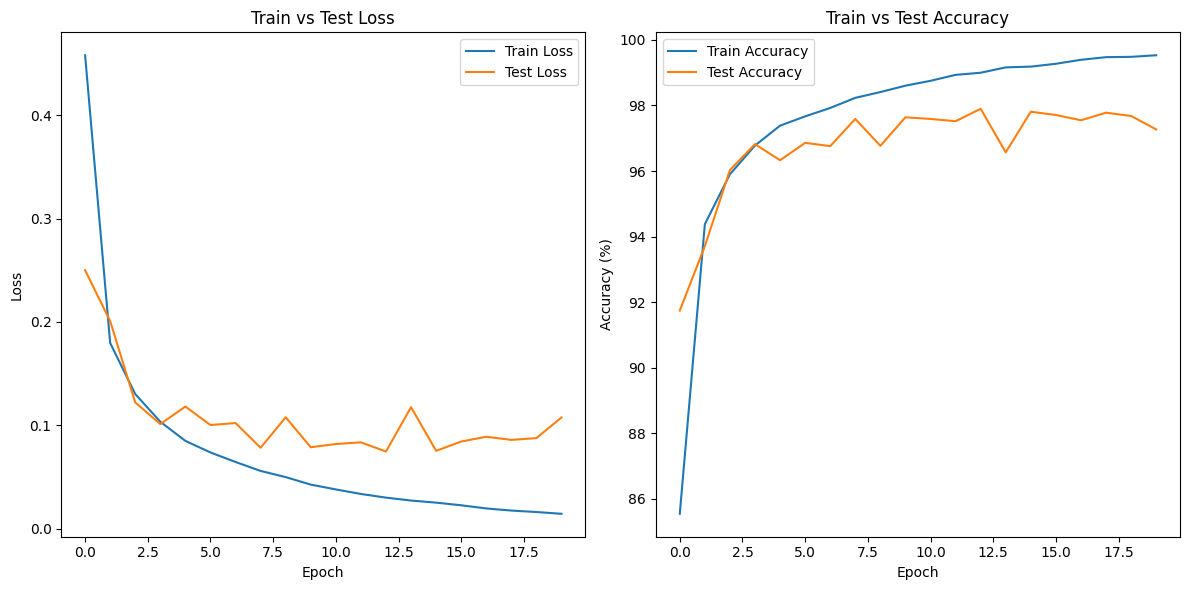

In [6]:
# 訓練とテストの損失をプロット
plt.figure(figsize=(12, 6))

# 損失のプロット
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()

# 精度のプロット
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()

# プロットを表示
plt.tight_layout()
plt.show()